<a href="https://colab.research.google.com/github/vicente-gonzalez-ruiz/medical_imaging/blob/main/notebooks/pixel_normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import requests
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# 1. Download the image
# The provided URL is a case page, not a direct image URL.
# I will use a publicly available medical image URL for demonstration.
# Example: A chest X-ray from a public dataset
image_url = "https://d2rfm59k9u0hrr.cloudfront.net/medpix/img/full/synpic19850.jpg"

response = requests.get(image_url, stream=True)
response.raise_for_status()

# Save the image to a file
image_path = "medical_image.jpg"
with open(image_path, 'wb') as out_file:
    out_file.write(response.content)

# Open the image using Pillow
img = Image.open(image_path)

# Convert the image to a numpy array
img_np = np.array(img)

Maximum pixel value: 175
Minimum pixel value: 0


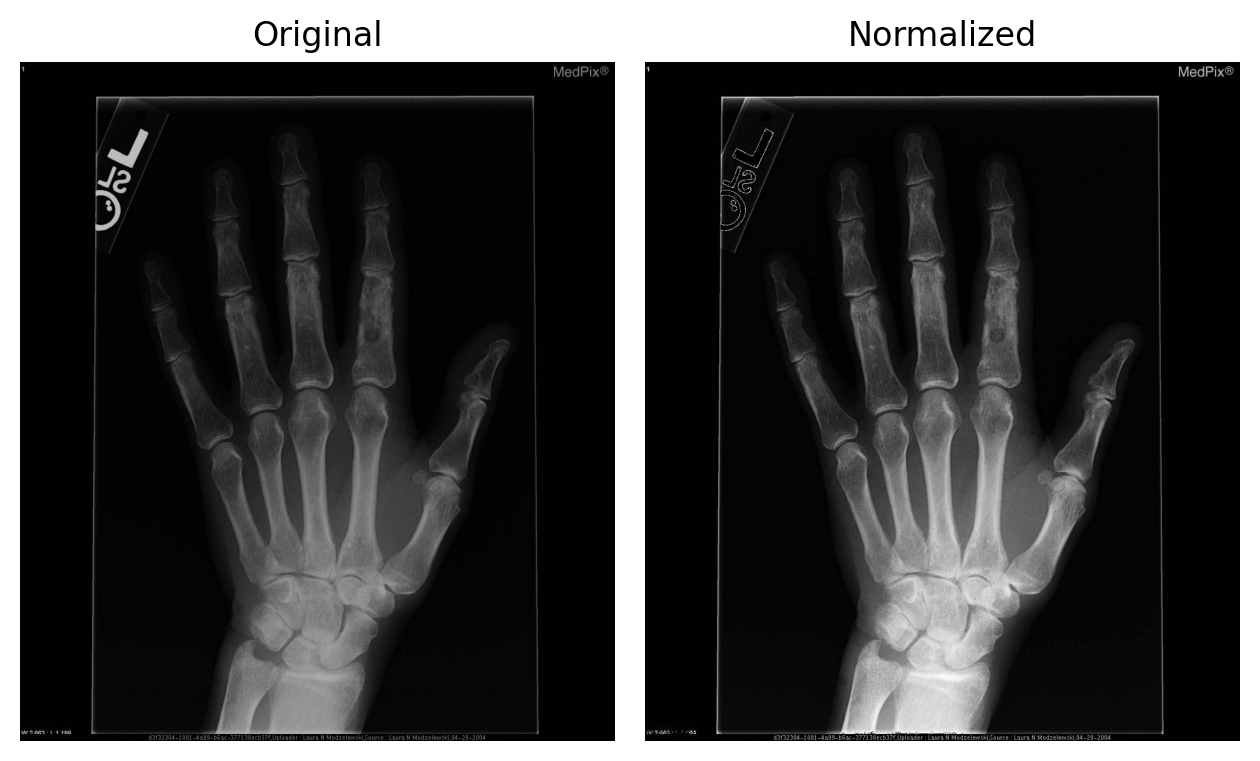

In [4]:
# Assuming 'img_np' is the numpy array of the image from a previous cell

# Find the maximum pixel value in the original image
max_value = np.max(img_np)

# Create a mask for pixels with the maximum value
mask = img_np > (max_value - 80)

# Set the maximum pixel values to 0
new_img = img_np.copy() # Create a copy to avoid modifying the original array
new_img[mask] = 0

max_pixel_val = np.max(new_img)
min_pixel_val = np.min(new_img)

print(f"Maximum pixel value: {max_pixel_val}")
print(f"Minimum pixel value: {min_pixel_val}")
# Normalize the image to the range [0, 255]
img_normalized = (new_img - min_pixel_val) / (max_pixel_val - min_pixel_val) * 255

# Convert back to integer type if needed for display or saving
img_normalized = img_normalized.astype(np.uint8)

# Display the original and the image with max values set to zero
fig, axes = plt.subplots(1, 2, dpi=200) # 1 row, 2 columns

# Display the original image
axes[0].imshow(img_np, cmap='gray')
axes[0].set_title("Original")
axes[0].axis('off')

# Display the image with max values set to zero
axes[1].imshow(img_normalized, cmap='gray')
axes[1].set_title("Normalized")
axes[1].axis('off')

plt.tight_layout()
plt.savefig("pixel_normalization.png")
plt.show()